In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [2]:
# Loading the dataset
df_cust = pd.read_excel("customer_retention_dataset.xlsx")
df_cust.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [3]:
# Shape
df_cust.shape

(269, 71)

    The dataset have 71 columns or attributes and 269 rows representing each respondant's answers values of each attribute.

###### Renaming the columns name

In [4]:
# checking the columns
df_cust.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
# Instanciating the list of columns name
column_list = df_cust.columns

new_col_list = []
for col in column_list:
    # Removing the digits from the column name
    without_digits = col.lstrip(string.digits)
    # Removing the white spaces
    without_spaces = without_digits.strip()
    # Replacing space with '_'
    replace_char = without_spaces.replace("-", "_").replace(" ", "_")
    # Removing special characters
#     without_chars = re.sub('[^a-zA-Z0-9]+', '',replace_char)
    new_col_list.append(replace_char)

new_col_list

['Gender_of_respondent',
 'How_old_are_you?',
 'Which_city_do_you_shop_online_from?',
 'What_is_the_Pin_Code_of_where_you_shop_online_from?',
 'Since_How_Long_You_are_Shopping_Online_?',
 'How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?',
 'How_do_you_access_the_internet_while_shopping_on_line?',
 'Which_device_do_you_use_to_access_the_online_shopping?',
 'What_is_the_screen_size_of_your_mobile_device?',
 'What_is_the_operating_system_(OS)_of_your_device?',
 'What_browser_do_you_run_on_your_device_to_access_the_website?',
 'Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time?',
 'After_first_visit,_how_do_you_reach_the_online_retail_store?',
 'How_much_time_do_you_explore_the_e__retail_store_before_making_a_purchase_decision?',
 'What_is_your_preferred_payment_Option?',
 'How_frequently_do_you_abandon_(selecting_an_items_and_leaving_without_making_payment)_your_shopping_cart?',
 'Why_did_you_abandon_the_“Bag”,_“Shopping_Cart”?',
 

In [6]:
# Renaming the old columns of the dataset with the modified columns name.

df_cust.rename(columns=dict(zip(list(df_cust.columns), new_col_list)), inplace=True)

In [7]:
# Checking the dataset after renaming the columns name.

df_cust.head()

Gender_of_respondent How_old_are_you? Which_city_do_you_shop_online_from?  \
0                 Male      31-40 years                               Delhi   
1               Female      21-30 years                               Delhi   
2               Female      21-30 years                       Greater Noida   
3                 Male      21-30 years                             Karnal    
4               Female      21-30 years                          Bangalore    

   What_is_the_Pin_Code_of_where_you_shop_online_from?  \
0                                             110009     
1                                             110030     
2                                             201308     
3                                             132001     
4                                             530068     

  Since_How_Long_You_are_Shopping_Online_?  \
0                            Above 4 years   
1                            Above 4 years   
2                                3-4 years   
3                                3-4 years   
4                                2-3 years   

  How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?  \
0                                        31-40 times                    
1                                 41 times and above                    
2                                 41 times and above                    
3                                 Less than 10 times                    
4                                        11-20 times                    

  How_do_you_access_the_internet_while_shopping_on_line?  \
0                                            Dial-up       
1                                              Wi-Fi       
2                                    Mobile Internet       
3                                    Mobile Internet       
4                                              Wi-Fi       

  Which_device_do_you_use_to_access_the_online_shopping?  \
0                                            Desktop       
1                                         Smartphone       
2                                         Smartphone       
3                                         Smartphone       
4                                         Smartphone       

  What_is_the_screen_size_of_your_mobile_device?  \
0                                         Others   
1                                     4.7 inches   
2                                     5.5 inches   
3                                     5.5 inches   
4                                     4.7 inches   

  What_is_the_operating_system_(OS)_of_your_device?  \
0                             Window/windows Mobile   
1                                           IOS/Mac   
2                                           Android   
3                                           IOS/Mac   
4                                           IOS/Mac   

  What_browser_do_you_run_on_your_device_to_access_the_website?  \
0                                      Google chrome              
1                                      Google chrome              
2                                      Google chrome              
3                                             Safari              
4                                             Safari              

  Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time?  \
0                                      Search Engine                                         
1                                      Search Engine                                         
2                                      Search Engine                                         
3                                      Search Engine                                         
4                                  Content Marketing                                         

  After_first_visit,_how_do_you_reach_the_online_retail_store?  \
0                                      Search Engine          

In [8]:
# info of the dataset.

df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Gender_of_respondent                                                                                       269 non-null    object
 1   How_old_are_you?                                                                                           269 non-null    object
 2   Which_city_do_you_shop_online_from?                                                                        269 non-null    object
 3   What_is_the_Pin_Code_of_where_you_shop_online_from?                                                        269 non-null    int64 
 4   Since_How_Long_You_are_Shopping_Online_?                                        

    The whole dataset is categorical in nature except for one column or feature named
    'What_is_the_Pin_Code_of_where_you_shop_online_from?' which is numeric in nature being of discrete form.

###### Checking the missing values

Series([], dtype: int64)

 Total columns having missing values :  0 



<AxesSubplot:>

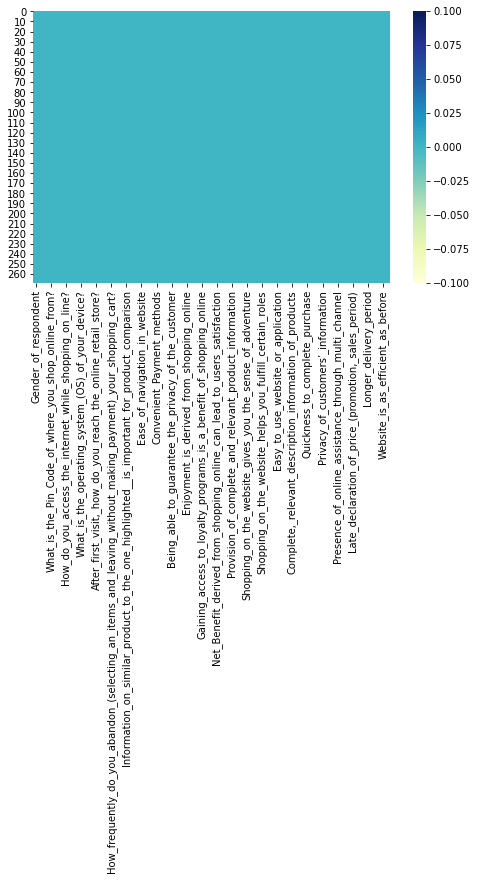

In [9]:
# Let's check the null values
missing_values = df_cust.isnull().sum()
# print(missing_values, ' \n\n')

# Filtering the missing count columns only
missing_count = missing_values[missing_values > 0]
print(missing_count.sort_values())
print("\n Total columns having missing values : ", len(missing_count), '\n')

# Visualizing the missing values using heatmap.
plt.figure(figsize=(8,5))
sns.heatmap(df_cust.isnull(), cmap = 'YlGnBu')

    There are no null values in the whole dataset.

###### Statistical Summary

    The statisical summary without converting the data into numeric, as the whole data is on object form.

In [57]:
# Let's use the describe function to check the statistical summary of the train dataset.

df_cust.describe(include='object')

Gender_of_respondent How_old_are_you?  \
count                   269              269   
unique                    2                5   
top                  Female      31-40 years   
freq                    181               81   

       Which_city_do_you_shop_online_from?  \
count                                  269   
unique                                  11   
top                                  Delhi   
freq                                    58   

       Since_How_Long_You_are_Shopping_Online_?  \
count                                       269   
unique                                        5   
top                               Above 4 years   
freq                                         98   

       How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?  \
count                                                 269                    
unique                                                  6                    
top                                    Less than 10 times                    
freq                                                  114                    

       How_do_you_access_the_internet_while_shopping_on_line?  \
count                                                 269       
unique                                                  3       
top                                       Mobile Internet       
freq                                                  189       

       Which_device_do_you_use_to_access_the_online_shopping?  \
count                                                 269       
unique                                                  4       
top                                            Smartphone       
freq                                                  141       

       What_is_the_screen_size_of_your_mobile_device?  \
count                                             269   
unique                                              4   
top                                            Others   
freq                                              134   

       What_is_the_operating_system_(OS)_of_your_device?  \
count                                                269   
unique                                                 3   
top                                Window/windows Mobile   
freq                                                 122   

       What_browser_do_you_run_on_your_device_to_access_the_website?  \
count                                                 269              
unique                                                  4              
top                                         Google chrome              
freq                                                  216              

       Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time?  \
count                                                 269                                         
unique                                                  3                                         
top                                         Search Engine                                         
freq                                                  230                                         

       After_first_visit,_how_do_you_reach_the_online_retail_store?  \
count                                                 269             
unique                                                  5             
top                                         Search Engine             
freq                                                   87             

       How_much_time_do_you_explore_the_e__retail_store_before_making_a_purchase_decision?  \
count                                                 269                                    
unique                                                  5                                    
top                                     more than 15 mins                                    
freq                                                  123   

    The above statistical summary of all categorical data depicts:
        - The total count which is same of every feature, which means there are no missing values.
        - Unique values represents the total categories present in a particular attribute.
        - Top, depicts the most top category with the highest count of a attribute.
        - Frequency represents the total count of the top category of the attribute.

###### Understanding the data via visualizing the same.

In [10]:
df_cust.columns

Index(['Gender_of_respondent', 'How_old_are_you?',
       'Which_city_do_you_shop_online_from?',
       'What_is_the_Pin_Code_of_where_you_shop_online_from?',
       'Since_How_Long_You_are_Shopping_Online_?',
       'How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?',
       'How_do_you_access_the_internet_while_shopping_on_line?',
       'Which_device_do_you_use_to_access_the_online_shopping?',
       'What_is_the_screen_size_of_your_mobile_device?',
       'What_is_the_operating_system_(OS)_of_your_device?',
       'What_browser_do_you_run_on_your_device_to_access_the_website?',
       'Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time?',
       'After_first_visit,_how_do_you_reach_the_online_retail_store?',
       'How_much_time_do_you_explore_the_e__retail_store_before_making_a_purchase_decision?',
       'What_is_your_preferred_payment_Option?',
       'How_frequently_do_you_abandon_(selecting_an_items_and_leaving_without_ma

In [11]:
# Value count of 'Gender_of_respondent'

df_cust['Gender_of_respondent'].value_counts()

Female    181
Male       88
Name: Gender_of_respondent, dtype: int64

The column - 'Gender_of_respondent' has 2 categories of male and female, to which the count of female respondants is 
higher as compared to male respondants. This shows the females have great participation for the e-retail survey in order to help the companies to hold their customers

<AxesSubplot:xlabel='Gender_of_respondent', ylabel='count'>

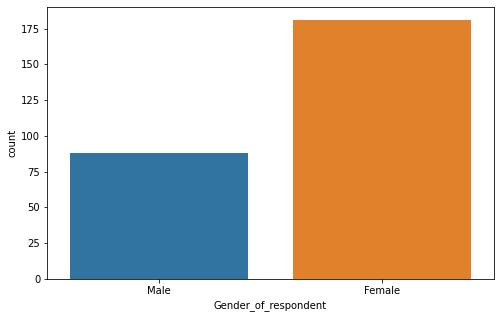

In [12]:
# Visualizing the count of gender

plt.figure(figsize=(8,5))
sns.countplot(df_cust['Gender_of_respondent'], data = df_cust)

    The males are 32% of the total gender count as compared to females being 67%.

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: How_old_are_you?, dtype: int64


<AxesSubplot:xlabel='How_old_are_you?', ylabel='count'>

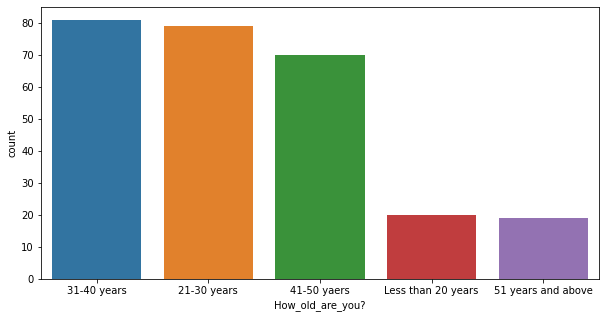

In [13]:
# 'How_old_are_you?'

print(df_cust['How_old_are_you?'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(df_cust['How_old_are_you?'], data = df_cust)

<AxesSubplot:xlabel='How_old_are_you?', ylabel='count'>

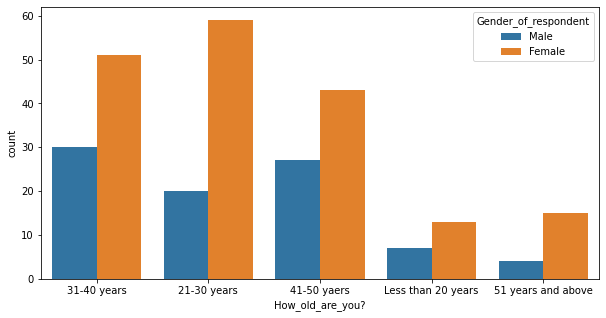

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = df_cust['How_old_are_you?'], hue = df_cust['Gender_of_respondent'], data = df_cust)

In [15]:
#  let's check the count of city from where people do maximum shopping. Thus city having highest number of purchases/shopping by the people.

df_cust['Which_city_do_you_shop_online_from?'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Which_city_do_you_shop_online_from?, dtype: int64

<AxesSubplot:xlabel='Which_city_do_you_shop_online_from?', ylabel='count'>

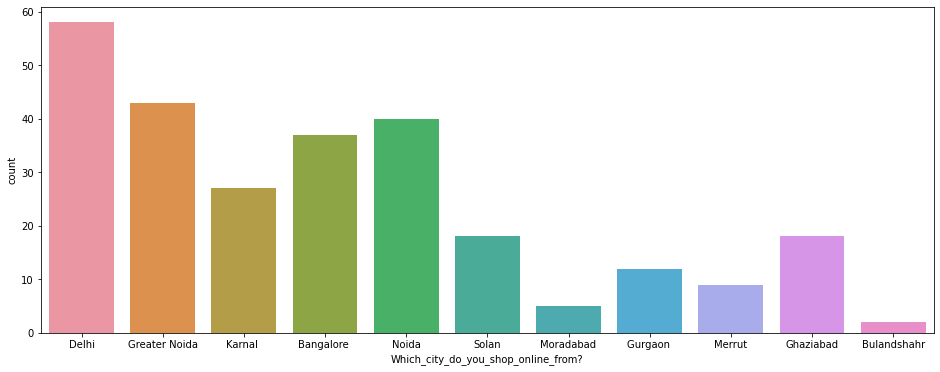

In [16]:
plt.figure(figsize=(16,6))
sns.countplot(df_cust['Which_city_do_you_shop_online_from?'], data = df_cust)

    From the above countplot,  Delhi is the city having higest number of purchasers among the other respective cities. This, plot also shows that the count of people from delhi is more as compared to other citied in respect of online shopping.
    
    On the other hand, Bulandshahr & moradabad are not much adaptive for online shopping as per this dataset.

<AxesSubplot:xlabel='Which_city_do_you_shop_online_from?', ylabel='count'>

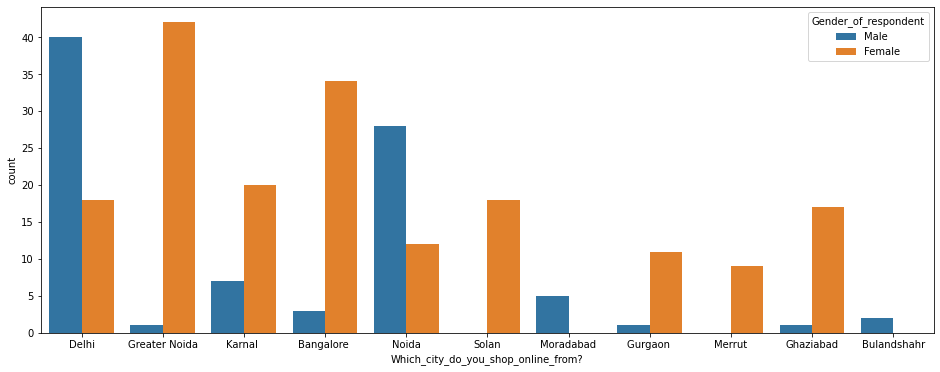

In [17]:
# Visualizing the count of cities from where the online shopping to be done inrespect of gender.

plt.figure(figsize=(16,6))
sns.countplot(df_cust['Which_city_do_you_shop_online_from?'], hue = df_cust['Gender_of_respondent'], data = df_cust)

    From the above countplot, 
    - The count of males from Delhi city and females from Greater Noida is higher among all the other cities.
    - And in Bulandshahr city there are no females who have done online shopping. 
    - Similarly, males do not shop online who belongs to Merrut and Solan.
    - In the whole dataset, the males shop online more as compared to feamles belongs to two cities only, named Delhi 
      followed by Noida.

201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3
203001     2
560001     1
203207     1
203202     1
Name: What_is_the_Pin_Code_of_where_you_shop_online_from?, dtype: int64 



<AxesSubplot:xlabel='What_is_the_Pin_Code_of_where_you_shop_online_from?', ylabel='count'>

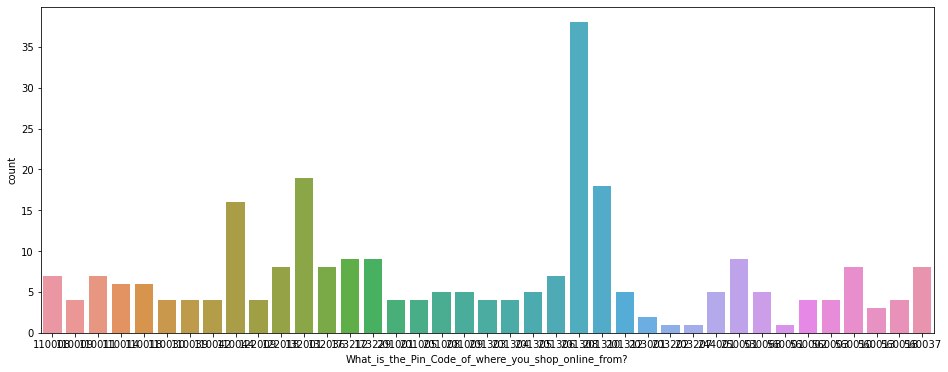

In [18]:
# Checking the count of area pincodes and thus identifying the pincode having highest number of online shopping and thus visualizing the same.

print(df_cust['What_is_the_Pin_Code_of_where_you_shop_online_from?'].value_counts(sort=True), '\n')

plt.figure(figsize=(16,6))
sns.countplot(df_cust['What_is_the_Pin_Code_of_where_you_shop_online_from?'], data = df_cust)

    The maximum online shopping is traced from the area pincode - 201308 which is of Gearter Noida, postal code in Uttar 
    Padesh. Thus, online shopping dfrom this postal code is seen in much hifgher count as compared to other postal codes in this dataset.
    

In [19]:
# 'Since_How_Long_You_are_Shopping_Online_?'

df_cust['Since_How_Long_You_are_Shopping_Online_?'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Since_How_Long_You_are_Shopping_Online_?, dtype: int64

<AxesSubplot:xlabel='Since_How_Long_You_are_Shopping_Online_?', ylabel='count'>

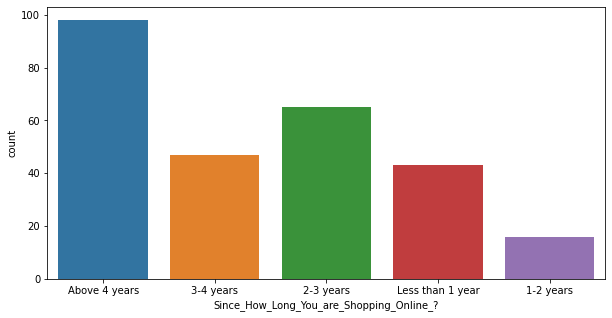

In [20]:
# Plotting the count of abouut how long people are shopping online.

plt.figure(figsize=(10,5))
sns.countplot(df_cust['Since_How_Long_You_are_Shopping_Online_?'], data = df_cust)

<AxesSubplot:ylabel='Since_How_Long_You_are_Shopping_Online_?'>

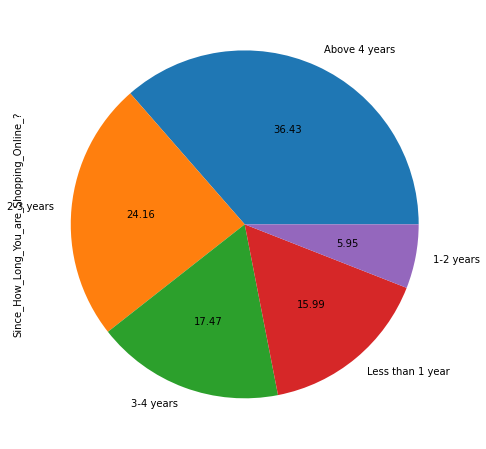

In [21]:
# Plotting the above same using pie chart

plt.figure(figsize=(15,8))
df_cust['Since_How_Long_You_are_Shopping_Online_?'].value_counts().plot(kind='pie', autopct='%.2f')

    The above plots shows that maximum number of people are shopping online from past 4 years. Thus the ratio of shopping 
    online is more of 4 years having 36.43% and the least is of 1-2 years being only 5.95% of the total data.

In [22]:
# 'How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?'

df_cust['How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?, dtype: int64

<AxesSubplot:xlabel='How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?', ylabel='count'>

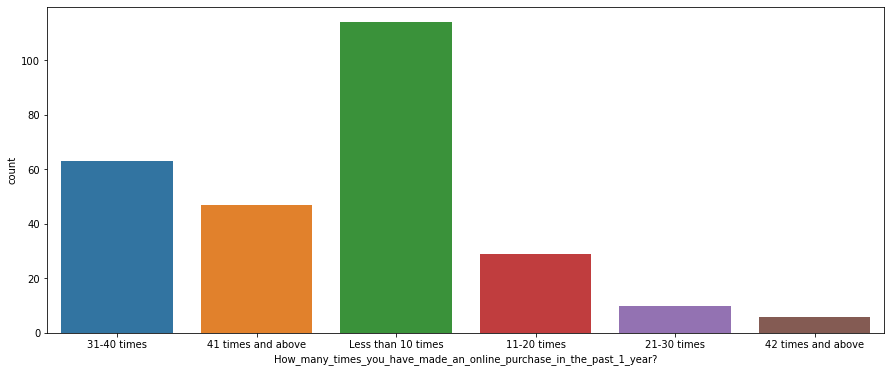

In [23]:
# Plotting the count of 'How_many_times_you_have_made_an_online_purchase_in_the_past_1_year'

plt.figure(figsize=(15,6))
sns.countplot(df_cust['How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?'], data = df_cust)

    Maximum number of people have done online shopping about less than 10 times in past 1 year, but around 02% people have
    done online purchasing about 42 times and above in past 1 year.

In [24]:
# 'How_do_you_access_the_internet_while_shopping_on-line?'

df_cust['How_do_you_access_the_internet_while_shopping_on_line?'].replace('Mobile internet', 'Mobile Internet', inplace=True)

Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: How_do_you_access_the_internet_while_shopping_on_line?, dtype: int64 

Mobile Internet    0.702602
Wi-Fi              0.282528
Dial-up            0.014870
Name: How_do_you_access_the_internet_while_shopping_on_line?, dtype: float64


<AxesSubplot:xlabel='How_do_you_access_the_internet_while_shopping_on_line?', ylabel='count'>

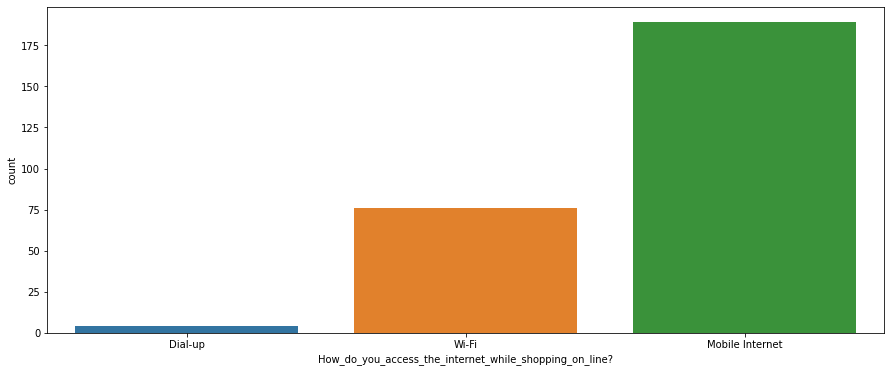

In [25]:
# 'How_do_you_access_the_internet_while_shopping_on-line?'

print(df_cust['How_do_you_access_the_internet_while_shopping_on_line?'].value_counts(), '\n')
print(df_cust['How_do_you_access_the_internet_while_shopping_on_line?'].value_counts(normalize=True))

plt.figure(figsize=(15,6))
sns.countplot(df_cust['How_do_you_access_the_internet_while_shopping_on_line?'], data = df_cust)

    Majority of the people being 70% uses Mobile internet to shop online. 

<AxesSubplot:xlabel='How_do_you_access_the_internet_while_shopping_on_line?', ylabel='count'>

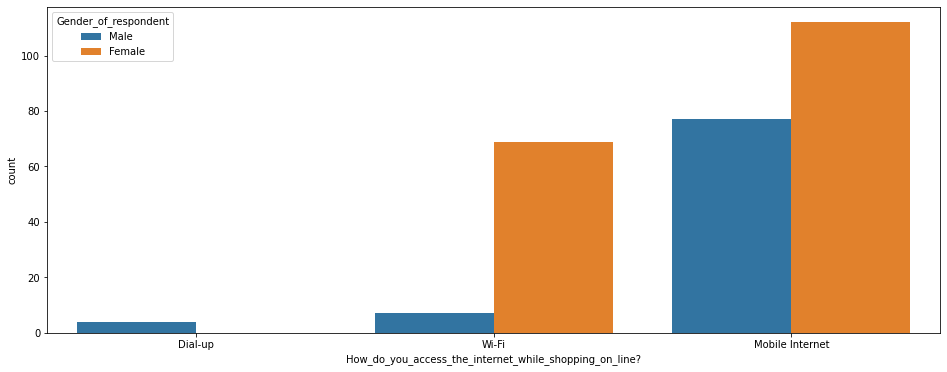

In [26]:
plt.figure(figsize=(16,6))
sns.countplot(df_cust['How_do_you_access_the_internet_while_shopping_on_line?'], hue = df_cust['Gender_of_respondent'], data = df_cust)

    The count of females is more than the males for using mobile internet and Wi-Fi, but females don't access the dial-up to shop online.

<AxesSubplot:xlabel='How_do_you_access_the_internet_while_shopping_on_line?', ylabel='How_old_are_you?'>

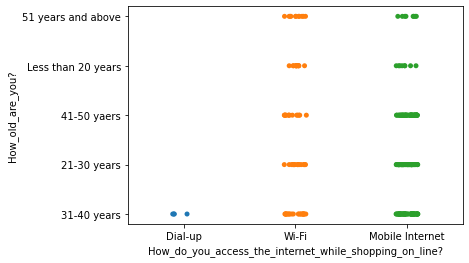

In [27]:
sns.stripplot(x = df_cust['How_do_you_access_the_internet_while_shopping_on_line?'], y = df_cust['How_old_are_you?'], data = df_cust)

    Here, Mobile Internet and Wi-Fi are used by every age group. On the other hand, Dial-up is just used by the people of
    age-group 31-40 years.

<AxesSubplot:xlabel='How_do_you_access_the_internet_while_shopping_on_line?', ylabel='Which_city_do_you_shop_online_from?'>

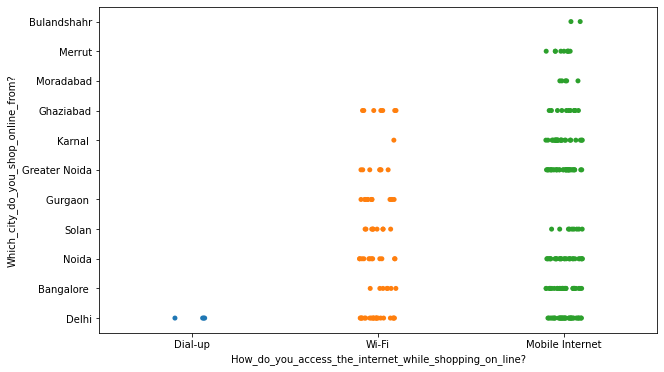

In [28]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df_cust['How_do_you_access_the_internet_while_shopping_on_line?'], y = df_cust['Which_city_do_you_shop_online_from?'], data = df_cust)

    From the above plot, it is observed,
    - People belongs to Delhi only access the dial-up in order to shop online.
    - Gurgaon consumers don't use mobile internet, rest all the citites consumers access the same to shop online.
    - Customers belongs to Moradabad, Merrut and Bulandshahr don't access Wi-Fi for online shopping.

In [29]:
# Device Related 

device_related = df_cust[['Which_device_do_you_use_to_access_the_online_shopping?', 
                         'What_is_the_screen_size_of_your_mobile_device?', 'What_is_the_operating_system_(OS)_of_your_device?', 
                         'What_browser_do_you_run_on_your_device_to_access_the_website?']]

# Checking the value counts of the variables.
for count in device_related.columns:
    x = device_related[count].value_counts()
    print("--------",count,"--------\n",x, '\n')
    print('{} has {} categories'.format(count,len(device_related[count].unique())))
    print('\n')

-------- Which_device_do_you_use_to_access_the_online_shopping? --------
 Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Which_device_do_you_use_to_access_the_online_shopping?, dtype: int64 

Which_device_do_you_use_to_access_the_online_shopping? has 4 categories


-------- What_is_the_screen_size_of_your_mobile_device? --------
 Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: What_is_the_screen_size_of_your_mobile_device?, dtype: int64 

What_is_the_screen_size_of_your_mobile_device? has 4 categories


-------- What_is_the_operating_system_(OS)_of_your_device? --------
 Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: What_is_the_operating_system_(OS)_of_your_device?, dtype: int64 

What_is_the_operating_system_(OS)_of_your_device? has 3 categories


-------- What_browser_do_you_run_on_your_device_to_access_the_website? --------
 Google chrome      216
Safari              40
Opera 

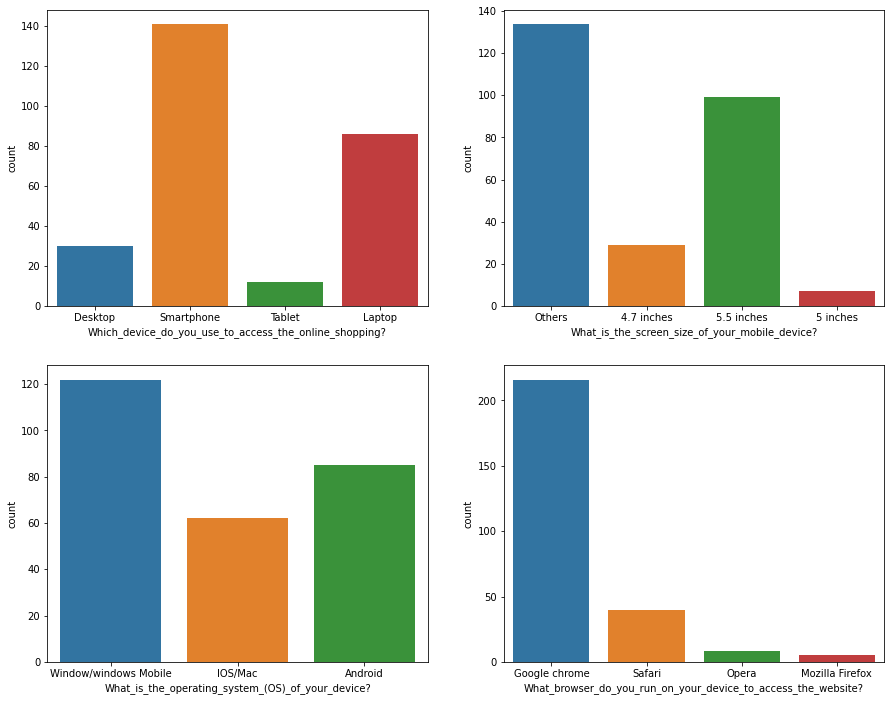

In [30]:
# Visualizing the count of device related columns

count=1
plt.subplots(figsize=(15, 12))
for i in device_related.columns:
    plt.subplot(2,2,count)
    sns.countplot(df_cust[i], data = df_cust)
    count+=1

plt.show()

    Observations:
        1. Which_device_do_you_use_to_access_the_online_shopping? - The smartphone users are more as compared to other 
                                                                    devices to be used by customers. The ratio of mpbile 
                                                                    users is 52% which is half of the total data for 
                                                                    this attribute.
                                                                    
        2. What_is_the_screen_size_of_your_mobile_device? - Around 49% consumers screen size is not specifically known as 
                                                            the count of 134 consumers have different screen size of their
                                                            device. But around 36% of the total data of this attribute 
                                                            have screen size of their device of 5.5 inches.
                                                            
        3. What_is_the_operating_system_(OS)_of_your_device? - Around 45% consumers have Window/windows Mobile as their
                                                               operating system of their device having mobile phones and
                                                               laptops for the same.
                                                               
        4. What_browser_do_you_run_on_your_device_to_access_the_website? - Majority of the consumers i.e. 80% use Google 
                                                                           Chrome to access the website.

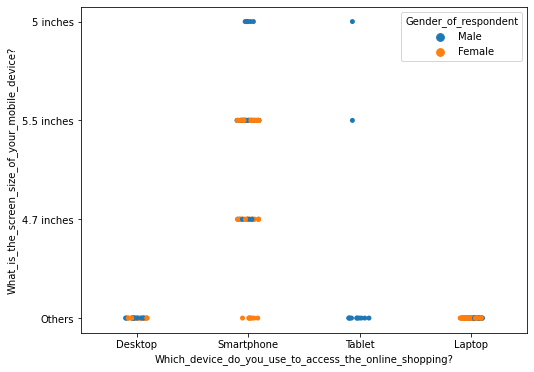

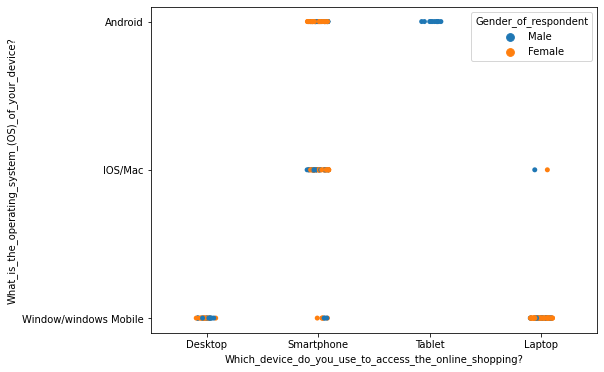

In [31]:
# Visualizing the count of device related columns
             
plt.figure(figsize=(8,6))
sns.stripplot(x = "Which_device_do_you_use_to_access_the_online_shopping?",
              y = "What_is_the_screen_size_of_your_mobile_device?", hue = "Gender_of_respondent", jitter = True, data = df_cust) 
plt.show()


plt.figure(figsize=(8,6))
sns.stripplot(x = "Which_device_do_you_use_to_access_the_online_shopping?",
              y = "What_is_the_operating_system_(OS)_of_your_device?", hue = "Gender_of_respondent", jitter = True,
              data = df_cust) 
plt.show()

    1. Females using smartphones have display in 'other' category. Thus, Only female's device display is not specific. 
    2. On the other hand, Tablet is only used by the males and thus having the display size with 'other' category.
    3. Only males using smartphones have 5 inches display of their respective device.
    4. Majority of the females uses smartphones having android OS.
    5. Males are the only one accessing tablets to shop online and having android as their operating system.
    6. IOS/Mac as a operating system is for the smartphones only which is accessible by both males and females.

<AxesSubplot:xlabel='What_browser_do_you_run_on_your_device_to_access_the_website?', ylabel='count'>

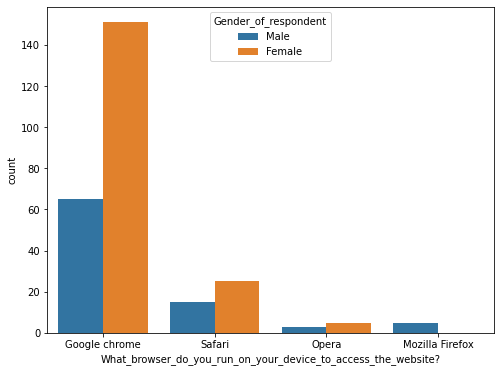

In [32]:
# Visualizing the count of 'What_browser_do_you_run_on_your_device_to_access_the_website?' in respect with 'Gender_of_respondent'.

plt.figure(figsize=(8,6))
sns.countplot(df_cust['What_browser_do_you_run_on_your_device_to_access_the_website?'], 
              hue = df_cust['Gender_of_respondent'], data = df_cust)

    - The count of females is more than males in using the Google Chrome as a brower to access the online shopping 
      websites.
    - Males are the only ones who are using Mozilla Firefox as a brower to access websites.
    - The count of males is almost less than the half of count of females in using Goggle Chrome.

In [33]:
# Reaching website

reaching_website = df_cust[['Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time?',
                            'After_first_visit,_how_do_you_reach_the_online_retail_store?']]

# Checking the value counts of the variables.
for count in reaching_website.columns:
    x = reaching_website[count].value_counts()
    print("--------",count,"--------\n",x, '\n')
    print('{} has {} categories'.format(count,len(reaching_website[count].unique())))
    print('\n')

-------- Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time? --------
 Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time?, dtype: int64 

Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time? has 3 categories


-------- After_first_visit,_how_do_you_reach_the_online_retail_store? --------
 Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: After_first_visit,_how_do_you_reach_the_online_retail_store?, dtype: int64 

After_first_visit,_how_do_you_reach_the_online_retail_store? has 5 categories




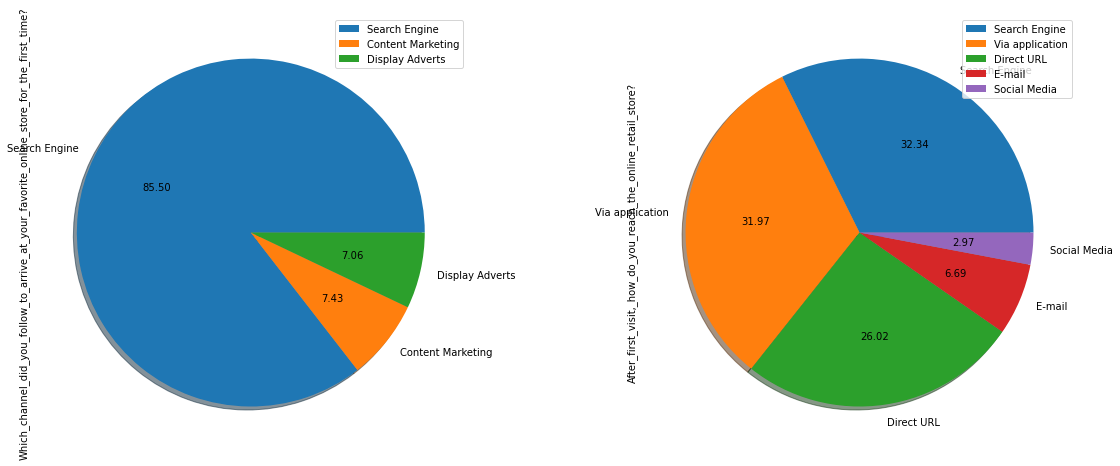

In [34]:
# Visualizing the count of reaching the websites related columns

count=1
plt.subplots(figsize=(20,8))
for i in reaching_website.columns:
    plt.subplot(1,2,count)
    df_cust[i].value_counts().plot(kind='pie', autopct='%.2f', shadow = True)
    plt.legend()
    count+=1
plt.show()

    -> Which_channel_did_you_follow_to_arrive_at_your_favorite_online_store_for_the_first_time? : 
           - Majority i.e. around 86% customers used search engines in order to reach their respective favorite online store 
             for the first time.
           - On the other hand, Display Adverts and Content marketing are almost or nearly equally used as a channel by the 
             customers for the same purpose.
        
    -> After_first_visit,_how_do_you_reach_the_online_retail_store? :
           - Around 32.34% and 31.97% customers have reached the online store using Search engines and Via respective 
               application.
           - Social media is not much popluar to reach the online store as it contributes nearly only 3%.
           - Direct - url is also prefferred by the customers for the same.
           - Thus, Search engines, applications and direct url are used or preferred the most by the customers to 
             reach online retail store respectively.

In [35]:
# Purchase and payment related

pur_and_pay = df_cust[['How_much_time_do_you_explore_the_e__retail_store_before_making_a_purchase_decision?',
                   'What_is_your_preferred_payment_Option?']]

# Checking the value counts of the variables.
for count in pur_and_pay.columns:
    x = pur_and_pay[count].value_counts()
    print("--------",count,"--------\n",x, '\n')
    print('\n')

-------- How_much_time_do_you_explore_the_e__retail_store_before_making_a_purchase_decision? --------
 more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: How_much_time_do_you_explore_the_e__retail_store_before_making_a_purchase_decision?, dtype: int64 



-------- What_is_your_preferred_payment_Option? --------
 Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: What_is_your_preferred_payment_Option?, dtype: int64 





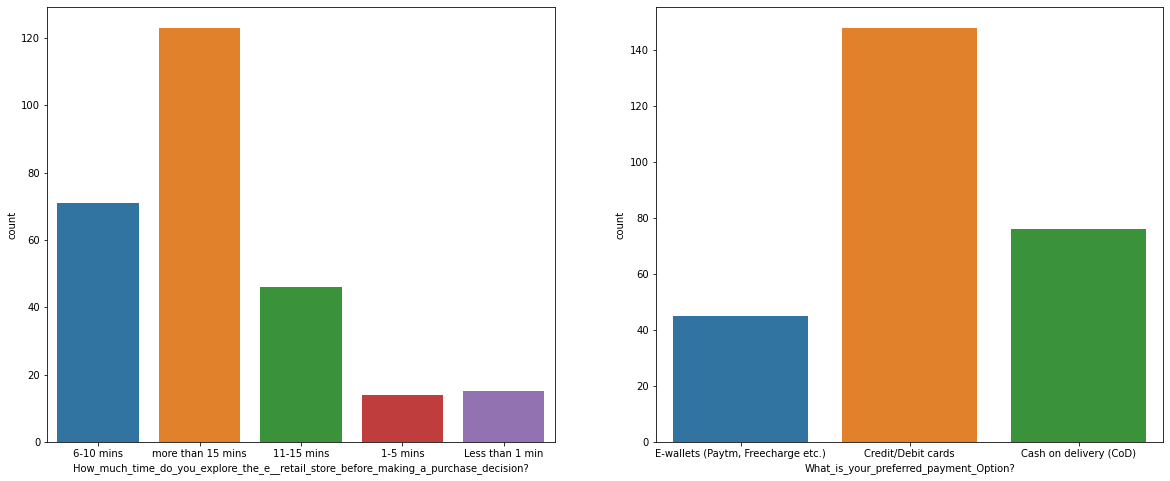

In [36]:
# 'How_much_time_do_you_explore_the_e__retail_store_before_making_a_purchase_decision?'

count=1
plt.subplots(figsize=(20,8))
for i in pur_and_pay.columns:
    plt.subplot(1,2,count)
    sns.countplot(df_cust[i], data = df_cust)
    count+=1
plt.show()

    - Maximum number i.e. 45% of customers explore the e-retail store more than 15 times before making a purchase decision.
    - Around 55% of the customers preferred Credit/debit Cards as payment option.
    - The Cash on delivery option is preferred by the custoners which are equal to the half of the customers using 
      credit/debit cards.

In [37]:
# Abonding related

abandon_related = df_cust[['How_frequently_do_you_abandon_(selecting_an_items_and_leaving_without_making_payment)_your_shopping_cart?',
       'Why_did_you_abandon_the_“Bag”,_“Shopping_Cart”?']]

# Checking the value counts of the variables.
for count in abandon_related.columns:
    x = abandon_related[count].value_counts()
    print("--------",count,"--------\n",x, '\n')
    print('\n')

-------- How_frequently_do_you_abandon_(selecting_an_items_and_leaving_without_making_payment)_your_shopping_cart? --------
 Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: How_frequently_do_you_abandon_(selecting_an_items_and_leaving_without_making_payment)_your_shopping_cart?, dtype: int64 



-------- Why_did_you_abandon_the_“Bag”,_“Shopping_Cart”? --------
 Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Why_did_you_abandon_the_“Bag”,_“Shopping_Cart”?, dtype: int64 





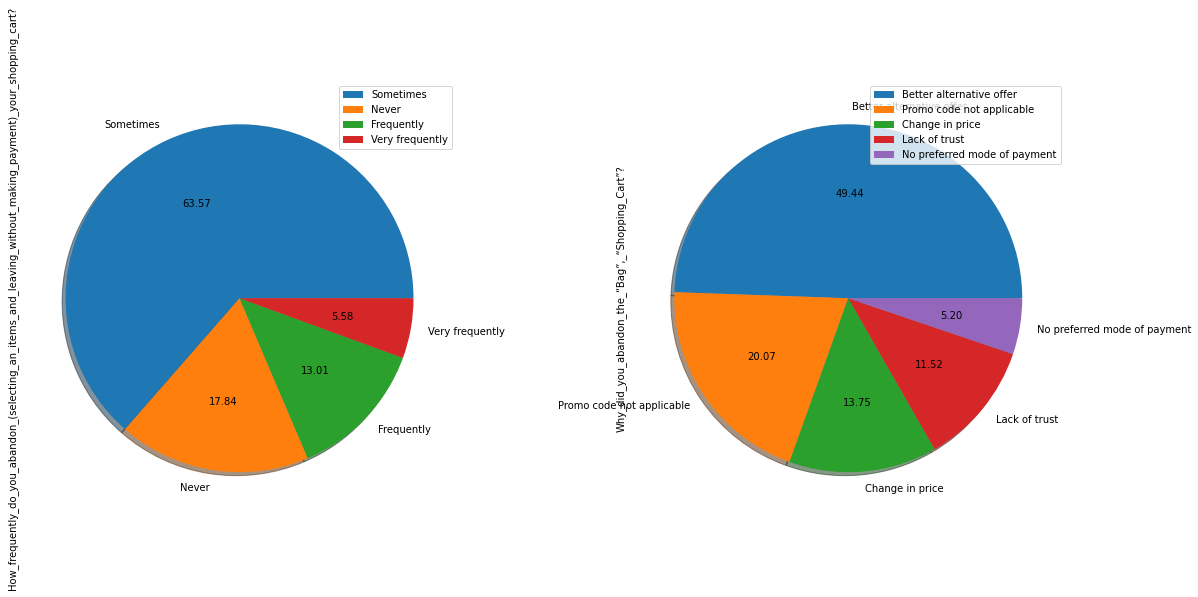

In [38]:
# Visualizing the count of reaching the websites related columns

count=1
plt.subplots(figsize=(20,8))
for i in abandon_related.columns:
    plt.subplot(1,2,count)
    df_cust[i].value_counts().plot(kind='pie', autopct='%.2f', shadow = True)
    plt.legend()
    count+=1
plt.show()

    -> How_frequently_do_you_abandon_(selecting_an_items_and_leaving_without_making_payment)_your_shopping_cart? :
            - Approximately, 64% customers sometimes leave the without making payment after selecting any item.
            - The customers who never leave as such and purchase the item selected is ust about approx. 18%.
            - Thus, the companies needs to be more innovative in order to hold the customers and let them purchase the items.
              So, that the percantage of customers leaving would be reduced.
            
    -> Why_did_you_abandon_the_“Bag”,_“Shopping_Cart”? :
            - The reason to abandon the bag or shopping cart can be interpreted from the above plot to be getting other better
              alternative offer.
            - Around 20% customers abandon the bag because the promo codes are not able to be applicable, thus customers 
              faces issue in getting te discounts using promo codes so, as a result the purchasing got abandoned.

In [39]:
# Creating a dataframe of the columns indicating the ratings by the respondants on various aspects.

ratings_related = df_cust[['The_content_on_the_website_must_be_easy_to_read_and_understand',
                           'Information_on_similar_product_to_the_one_highlighted__is_important_for_product_comparison',
                           'Complete_information_on_listed_seller_and_product_being_offered_is_important_for_purchase_decision.',
                           'All_relevant_information_on_listed_products_must_be_stated_clearly',
                           'Ease_of_navigation_in_website', 'Loading_and_processing_speed',
                           'User_friendly_Interface_of_the_website', 'Convenient_Payment_methods',
                           'Trust_that_the_online_retail_store_will_fulfill_its_part_of_the_transaction_at_the_stipulated_time',
                           'Empathy_(readiness_to_assist_with_queries)_towards_the_customers',
                           'Being_able_to_guarantee_the_privacy_of_the_customer',
                           'Responsiveness,_availability_of_several_communication_channels_(email,_online_rep,_twitter,_phone_etc.)',
                           'Online_shopping_gives_monetary_benefit_and_discounts',
                           'Enjoyment_is_derived_from_shopping_online','Shopping_online_is_convenient_and_flexible',
                           'Return_and_replacement_policy_of_the_e_tailer_is_important_for_purchase_decision',
                           'Gaining_access_to_loyalty_programs_is_a_benefit_of_shopping_online',
                           'Displaying_quality_Information_on_the_website_improves_satisfaction_of_customers',
                           'User_derive_satisfaction_while_shopping_on_a_good_quality_website_or_application',
                           'Net_Benefit_derived_from_shopping_online_can_lead_to_users_satisfaction',
                           'User_satisfaction_cannot_exist_without_trust',
                           'Offering_a_wide_variety_of_listed_product_in_several_category',
                           'Provision_of_complete_and_relevant_product_information',
                           'Monetary_savings',
                           'The_Convenience_of_patronizing_the_online_retailer',
                           'Shopping_on_the_website_gives_you_the_sense_of_adventure',
                           'Shopping_on_your_preferred_e_tailer_enhances_your_social_status',
                           'You_feel_gratification_shopping_on_your_favorite_e_tailer',
                           'Shopping_on_the_website_helps_you_fulfill_certain_roles',
                           'Getting_value_for_money_spent']]

In [40]:
len(ratings_related.columns)

30

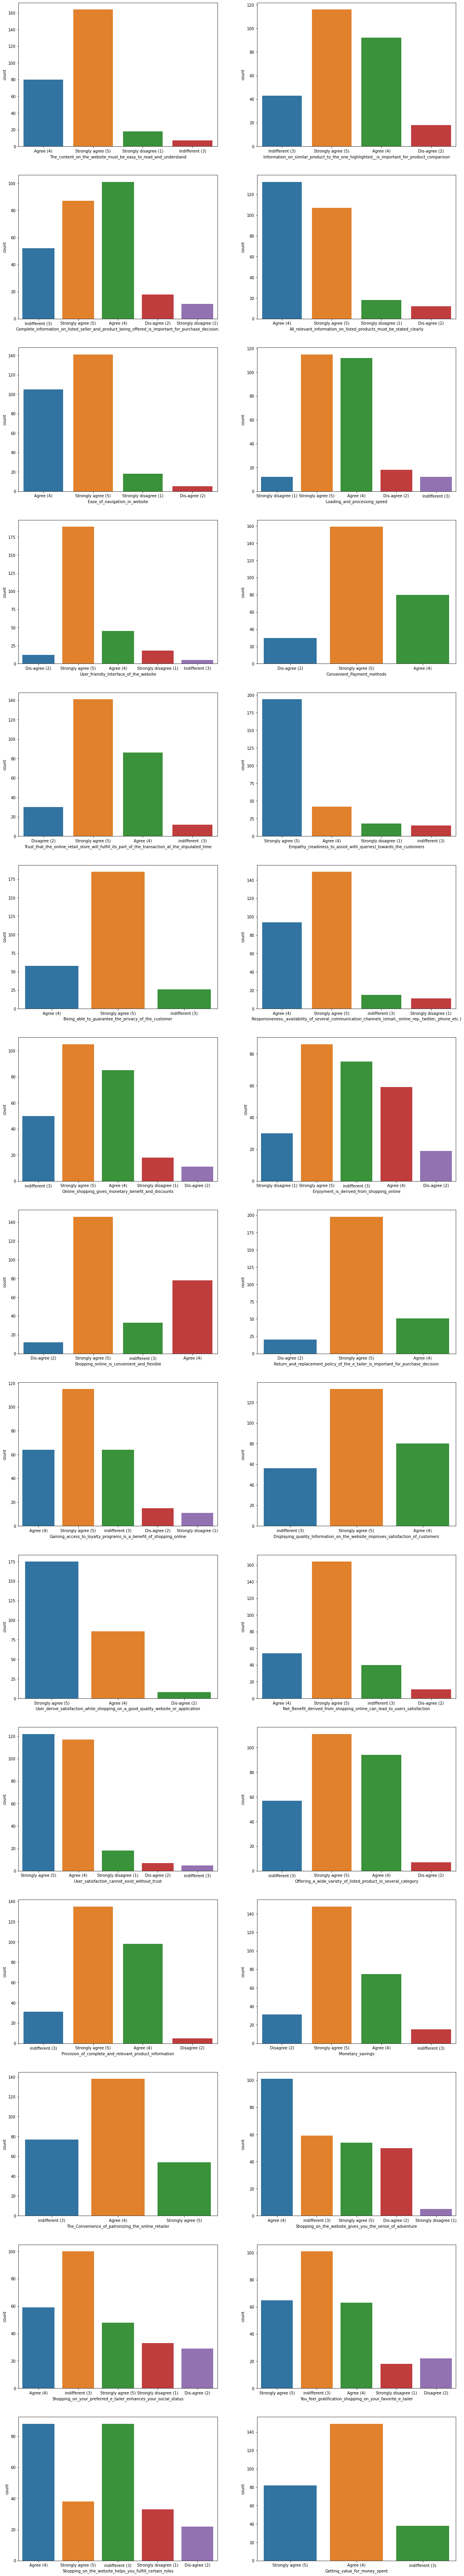

In [41]:
# Visualizing the plots in relation of the ratings on various aspects.

count=1
plt.figure(figsize=(20,120))
for i in ratings_related.columns:
    plt.subplot(15,2,count)
    sns.countplot(ratings_related[i], data = df_cust)
    count+=1

plt.show()

In [42]:
# Creating a dataframe of the columns indicating the choice of online retailers based on various aspects.

choice_related = df_cust[['From_the_following,_tick_any_(or_all)_of_the_online_retailers_you_have_shopped_from;',
                           'Easy_to_use_website_or_application',
                           'Visual_appealing_web_page_layout', 'Wild_variety_of_product_on_offer',
                           'Complete,_relevant_description_information_of_products',
                           'Fast_loading_website_speed_of_website_and_application',
                           'Reliability_of_the_website_or_application',
                           'Quickness_to_complete_purchase',
                           'Availability_of_several_payment_options', 'Speedy_order_delivery',
                           'Privacy_of_customers’_information',
                           'Security_of_customer_financial_information',
                           'Perceived_Trustworthiness',
                           'Presence_of_online_assistance_through_multi_channel',
                           'Longer_time_to_get_logged_in_(promotion,_sales_period)',
                           'Longer_time_in_displaying_graphics_and_photos_(promotion,_sales_period)',
                           'Late_declaration_of_price_(promotion,_sales_period)',
                           'Longer_page_loading_time_(promotion,_sales_period)',
                           'Limited_mode_of_payment_on_most_products_(promotion,_sales_period)',
                           'Longer_delivery_period', 'Change_in_website/Application_design',
                           'Frequent_disruption_when_moving_from_one_page_to_another',
                           'Website_is_as_efficient_as_before',
                           'Which_of_the_Indian_online_retailer_would_you_recommend_to_a_friend?']]

In [43]:
len(choice_related.columns)

24

In [44]:
# Separating the categories of the attributes.

def making_count(col_name):
    dict_of_count = {'amazon': 0, 'flipkart':0, 'myntra': 0, 'paytm': 0, 'snapdeal': 0}
    for row in df_cust[col_name].apply(lambda x: x.split(',')):
        for company in row:
            company = company.replace(".com", "").replace(".in", "").strip().lower()
            if col_name == 'Availability_of_several_payment_options':
                company = company.replace('patym', 'paytm')
            dict_of_count[company] += 1
            
    return dict_of_count

In [45]:
# Checking the list of attributes where the respondants have present their choice.

list_of_dict = []
for col_name in choice_related.columns:
    print(col_name)
    list_of_dict.append(making_count(col_name))

From_the_following,_tick_any_(or_all)_of_the_online_retailers_you_have_shopped_from;
Easy_to_use_website_or_application
Visual_appealing_web_page_layout
Wild_variety_of_product_on_offer
Complete,_relevant_description_information_of_products
Fast_loading_website_speed_of_website_and_application
Reliability_of_the_website_or_application
Quickness_to_complete_purchase
Availability_of_several_payment_options
Speedy_order_delivery
Privacy_of_customers’_information
Security_of_customer_financial_information
Perceived_Trustworthiness
Presence_of_online_assistance_through_multi_channel
Longer_time_to_get_logged_in_(promotion,_sales_period)
Longer_time_in_displaying_graphics_and_photos_(promotion,_sales_period)
Late_declaration_of_price_(promotion,_sales_period)
Longer_page_loading_time_(promotion,_sales_period)
Limited_mode_of_payment_on_most_products_(promotion,_sales_period)
Longer_delivery_period
Change_in_website/Application_design
Frequent_disruption_when_moving_from_one_page_to_another
W

In [46]:
# Printing the list of dictionary with their respective counts of the attributes.

list_of_dict

[{'amazon': 269,
  'flipkart': 221,
  'myntra': 146,
  'paytm': 150,
  'snapdeal': 182},
 {'amazon': 249,
  'flipkart': 201,
  'myntra': 147,
  'paytm': 125,
  'snapdeal': 130},
 {'amazon': 227, 'flipkart': 175, 'myntra': 115, 'paytm': 67, 'snapdeal': 61},
 {'amazon': 220, 'flipkart': 184, 'myntra': 64, 'paytm': 20, 'snapdeal': 14},
 {'amazon': 238, 'flipkart': 194, 'myntra': 64, 'paytm': 59, 'snapdeal': 59},
 {'amazon': 249, 'flipkart': 162, 'myntra': 74, 'paytm': 99, 'snapdeal': 81},
 {'amazon': 227, 'flipkart': 146, 'myntra': 64, 'paytm': 96, 'snapdeal': 45},
 {'amazon': 215, 'flipkart': 158, 'myntra': 79, 'paytm': 107, 'snapdeal': 29},
 {'amazon': 215, 'flipkart': 203, 'myntra': 132, 'paytm': 82, 'snapdeal': 90},
 {'amazon': 240, 'flipkart': 162, 'myntra': 29, 'paytm': 0, 'snapdeal': 50},
 {'amazon': 221, 'flipkart': 150, 'myntra': 78, 'paytm': 68, 'snapdeal': 45},
 {'amazon': 206, 'flipkart': 149, 'myntra': 91, 'paytm': 88, 'snapdeal': 100},
 {'amazon': 227, 'flipkart': 143, 'mynt

In [47]:
# Converting the list of dictionary into dataframe.

df_retailers = pd.DataFrame.from_dict(list_of_dict)

In [48]:
# Adding a column named 'Name_of_column' to the dataframe.

df_retailers['Name_of_column'] = choice_related.columns

In [49]:
# Checking the dataframe after making some modifications.

df_retailers

amazon  flipkart  myntra  paytm  snapdeal  \
0      269       221     146    150       182   
1      249       201     147    125       130   
2      227       175     115     67        61   
3      220       184      64     20        14   
4      238       194      64     59        59   
5      249       162      74     99        81   
6      227       146      64     96        45   
7      215       158      79    107        29   
8      215       203     132     82        90   
9      240       162      29      0        50   
10     221       150      78     68        45   
11     206       149      91     88       100   
12     227       143      88     24        74   
13     229       136     111     25        87   
14     135       103      35     77        67   
15     126        94      74     28        92   
16      56        43      75     72        48   
17      68        61      68     94        63   
18     104        60       7     53       109   
19      37        44      26     98        90   
20     141        72      37     63         8   
21      78        62      66     39        74   
22     182       117      14     58        25   
23     219       127      76     44        11   

                                       Name_of_column  
0   From_the_following,_tick_any_(or_all)_of_the_o...  
1                  Easy_to_use_website_or_application  
2                    Visual_appealing_web_page_layout  
3                    Wild_variety_of_product_on_offer  
4   Complete,_relevant_description_information_of_...  
5   Fast_loading_website_speed_of_website_and_appl...  
6           Reliability_of_the_website_or_application  
7                      Quickness_to_complete_purchase  
8             Availability_of_several_payment_options  
9                               Speedy_order_delivery  
10                  Privacy_of_customers’_information  
11         Security_of_customer_financial_information  
12                          Perceived_Trustworthiness  
13  Presence_of_online_assistance_through_multi_ch...  
14  Longer_time_to_get_logged_in_(promotion,_sales...  
15  Longer_time_in_displaying_graphics_and_photos_...  
16  Late_declaration_of_price_(promotion,_sales_pe...  
17  Longer_page_loading_time_(promotion,_sales_per...  
18  Limited_mode_of_payment_on_most_products_(prom...  
19                             Longer_delivery_period  
20               Change_in_website/Application_design  
21  Frequent_disruption_when_moving_from_one_page_...  
22                  Website_is_as_efficient_as_before  
23  Which_of_the_Indian_online_retailer_would_you_...

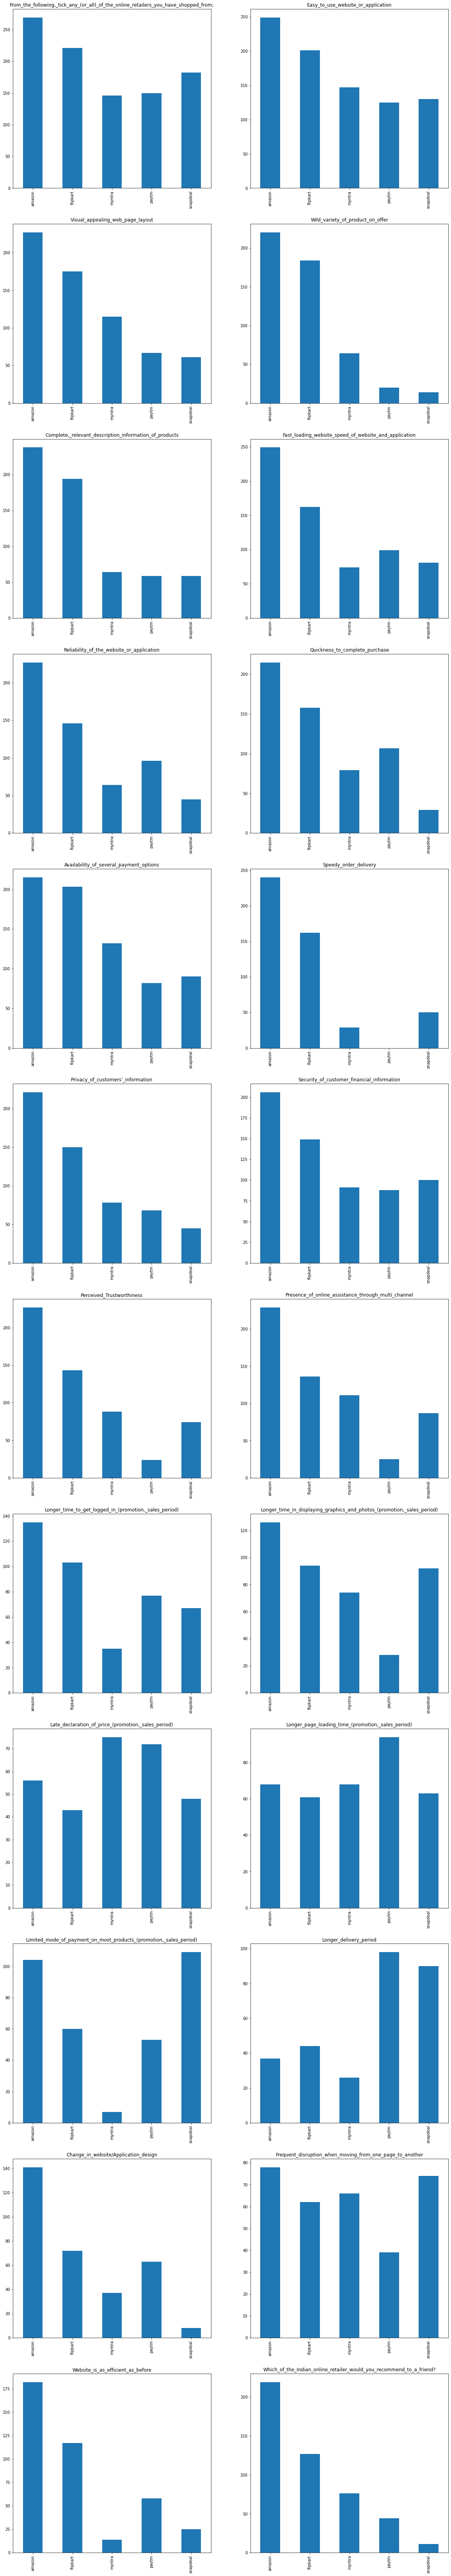

In [50]:
# Visualizing the plots in relation of the choice of online retailers based on various aspects.

count = 1
plt.figure(figsize=(20,120))
df_retail_data = df_retailers.drop('Name_of_column', axis = 1)
for i in range(len(df_retail_data)):
    plt.subplot(12, 2, count)
    plt.title(df_retailers['Name_of_column'].iloc[i])
    df_retail_data.iloc[i].plot(kind = 'bar')
    count += 1
plt.show()

###### Converting data into numeric

    This is done by just converting data using labelencoding.

In [58]:
# Using the LabelEncoder in order to convert the categorical data into numerical.

from sklearn.preprocessing import LabelEncoder

lb = {}
for i, feature in enumerate(df_cust):
    lb[feature] = LabelEncoder()
    df_cust[feature] = lb[feature].fit_transform(df_cust[feature])

df_cust

Gender_of_respondent  How_old_are_you?  \
0                       1                 1   
1                       0                 0   
2                       0                 0   
3                       1                 0   
4                       0                 0   
..                    ...               ...   
264                     0                 0   
265                     0                 1   
266                     0                 2   
267                     0                 4   
268                     0                 2   

     Which_city_do_you_shop_online_from?  \
0                                      2   
1                                      2   
2                                      4   
3                                      6   
4                                      0   
..                                   ...   
264                                   10   
265                                    3   
266                                    0   
267                                   10   
268                                    3   

     What_is_the_Pin_Code_of_where_you_shop_online_from?  \
0                                                    1     
1                                                    5     
2                                                   23     
3                                                   11     
4                                                   31     
..                                                 ...     
264                                                 13     
265                                                 17     
266                                                 35     
267                                                 14     
268                                                 18     

     Since_How_Long_You_are_Shopping_Online_?  \
0                                           3   
1                                           3   
2                                           2   
3                                           2   
4                                           1   
..                                        ...   
264                                         0   
265                                         0   
266                                         1   
267                                         1   
268                                         1   

     How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?  \
0                                                    2                     
1                                                    3                     
2                                                    3                     
3                                                    5                     
4                                                    0                     
..                                                 ...                     
264                                                  5                     
265                                                  2                     
266                                                  5                     
267                                                  5                     
268                                                  2                     

     How_do_you_access_the_internet_while_shopping_on_line?  \
0                                                    0        
1                                                    2        
2                                                    1        
3                                                    1        
4                                                    2        
..                                                 ...        
264                                                  1        
265                                                  1        
266                                                  1        
267                                                  2    

In [60]:
# Let's check the data type as well after converting categorical data into numerical.

df_cust.dtypes

Gender_of_respondent                                                    int32
How_old_are_you?                                                        int32
Which_city_do_you_shop_online_from?                                     int32
What_is_the_Pin_Code_of_where_you_shop_online_from?                     int64
Since_How_Long_You_are_Shopping_Online_?                                int32
                                                                        ...  
Longer_delivery_period                                                  int32
Change_in_website/Application_design                                    int32
Frequent_disruption_when_moving_from_one_page_to_another                int32
Website_is_as_efficient_as_before                                       int32
Which_of_the_Indian_online_retailer_would_you_recommend_to_a_friend?    int32
Length: 71, dtype: object

    The datatype has been converted into int64 and int32 

###### Statistical Summary

     This statistical summary of the data is after converting the same into numeric form.

In [64]:
df_cust.describe()

Gender_of_respondent  How_old_are_you?  \
count            269.000000        269.000000   
mean               0.327138          1.330855   
std                0.470042          1.183774   
min                0.000000          0.000000   
25%                0.000000          0.000000   
50%                0.000000          1.000000   
75%                1.000000          2.000000   
max                1.000000          4.000000   

       Which_city_do_you_shop_online_from?  \
count                           269.000000   
mean                              4.494424   
std                               3.187687   
min                               0.000000   
25%                               2.000000   
50%                               4.000000   
75%                               7.000000   
max                              10.000000   

       What_is_the_Pin_Code_of_where_you_shop_online_from?  \
count                                         269.000000     
mean                                           18.163569     
std                                            10.343865     
min                                             0.000000     
25%                                            10.000000     
50%                                            19.000000     
75%                                            24.000000     
max                                            38.000000     

       Since_How_Long_You_are_Shopping_Online_?  \
count                                269.000000   
mean                                   2.323420   
std                                    1.176357   
min                                    0.000000   
25%                                    1.000000   
50%                                    3.000000   
75%                                    3.000000   
max                                    4.000000   

       How_many_times_you_have_made_an_online_purchase_in_the_past_1_year?  \
count                                         269.000000                     
mean                                            3.237918                     
std                                             1.739331                     
min                                             0.000000                     
25%                                             2.000000                     
50%                                             3.000000                     
75%                                             5.000000                     
max                                             5.000000                     

       How_do_you_access_the_internet_while_shopping_on_line?  \
count                                         269.000000        
mean                                            1.267658        
std                                             0.476025        
min                                             0.000000        
25%                                             1.000000        
50%                                             1.000000        
75%                                             2.000000        
max                                             2.000000        

       Which_device_do_you_use_to_access_the_online_shopping?  \
count                                         269.000000        
mean                                            1.501859        
std                                             0.751240        
min                                             0.000000        
25%                                             1.000000        
50%                                             2.000000        
75%                                             2.000000        
max                                             3.000000        

       What_is_the_screen_size_of_your_mobile_device?  \
count                                      269.000000   
mean                                         2.256506   
std                                          0.944942   
min                         

###### Correlation

In [66]:
df_cust.corr()

Gender_of_respondent  \
Gender_of_respondent                                            1.000000   
How_old_are_you?                                                0.046169   
Which_city_do_you_shop_online_from?                             0.080912   
What_is_the_Pin_Code_of_where_you_shop_online_f...             -0.289628   
Since_How_Long_You_are_Shopping_Online_?                       -0.057096   
...                                                                  ...   
Longer_delivery_period                                          0.060838   
Change_in_website/Application_design                           -0.164818   
Frequent_disruption_when_moving_from_one_page_t...             -0.256638   
Website_is_as_efficient_as_before                               0.055663   
Which_of_the_Indian_online_retailer_would_you_r...             -0.003372   

                                                    How_old_are_you?  \
Gender_of_respondent                                        0.046169   
How_old_are_you?                                            1.000000   
Which_city_do_you_shop_online_from?                         0.113712   
What_is_the_Pin_Code_of_where_you_shop_online_f...         -0.133946   
Since_How_Long_You_are_Shopping_Online_?                   -0.087847   
...                                                              ...   
Longer_delivery_period                                     -0.156173   
Change_in_website/Application_design                       -0.134558   
Frequent_disruption_when_moving_from_one_page_t...         -0.018825   
Website_is_as_efficient_as_before                          -0.008582   
Which_of_the_Indian_online_retailer_would_you_r...         -0.135263   

                                                    Which_city_do_you_shop_online_from?  \
Gender_of_respondent                                                           0.080912   
How_old_are_you?                                                               0.113712   
Which_city_do_you_shop_online_from?                                            1.000000   
What_is_the_Pin_Code_of_where_you_shop_online_f...                            -0.064136   
Since_How_Long_You_are_Shopping_Online_?                                      -0.138329   
...                                                                                 ...   
Longer_delivery_period                                                        -0.123369   
Change_in_website/Application_design                                           0.000427   
Frequent_disruption_when_moving_from_one_page_t...                             0.019167   
Website_is_as_efficient_as_before                                              0.007117   
Which_of_the_Indian_online_retailer_would_you_r...                            -0.142123   

                                                    What_is_the_Pin_Code_of_where_you_shop_online_from?  \
Gender_of_respondent                                                                        -0.289628     
How_old_are_you?                                                                            -0.133946     
Which_city_do_you_shop_online_from?                                                         -0.064136     
What_is_the_Pin_Code_of_where_you_shop_online_f...                                           1.000000     
Since_How_Long_You_are_Shopping_Online_?                                                    -0.074280     
...                                                                                               ...     
Longer_delivery_period                                                                      -0.076998     
Change_in_website/Application_design                                                         0.001954     
Frequent_disruption_when_moving_from_one_page_t...                                           0.113557     
Website_is_as_efficient_as_before                                                           -0.008289     
Whic

<AxesSubplot:>

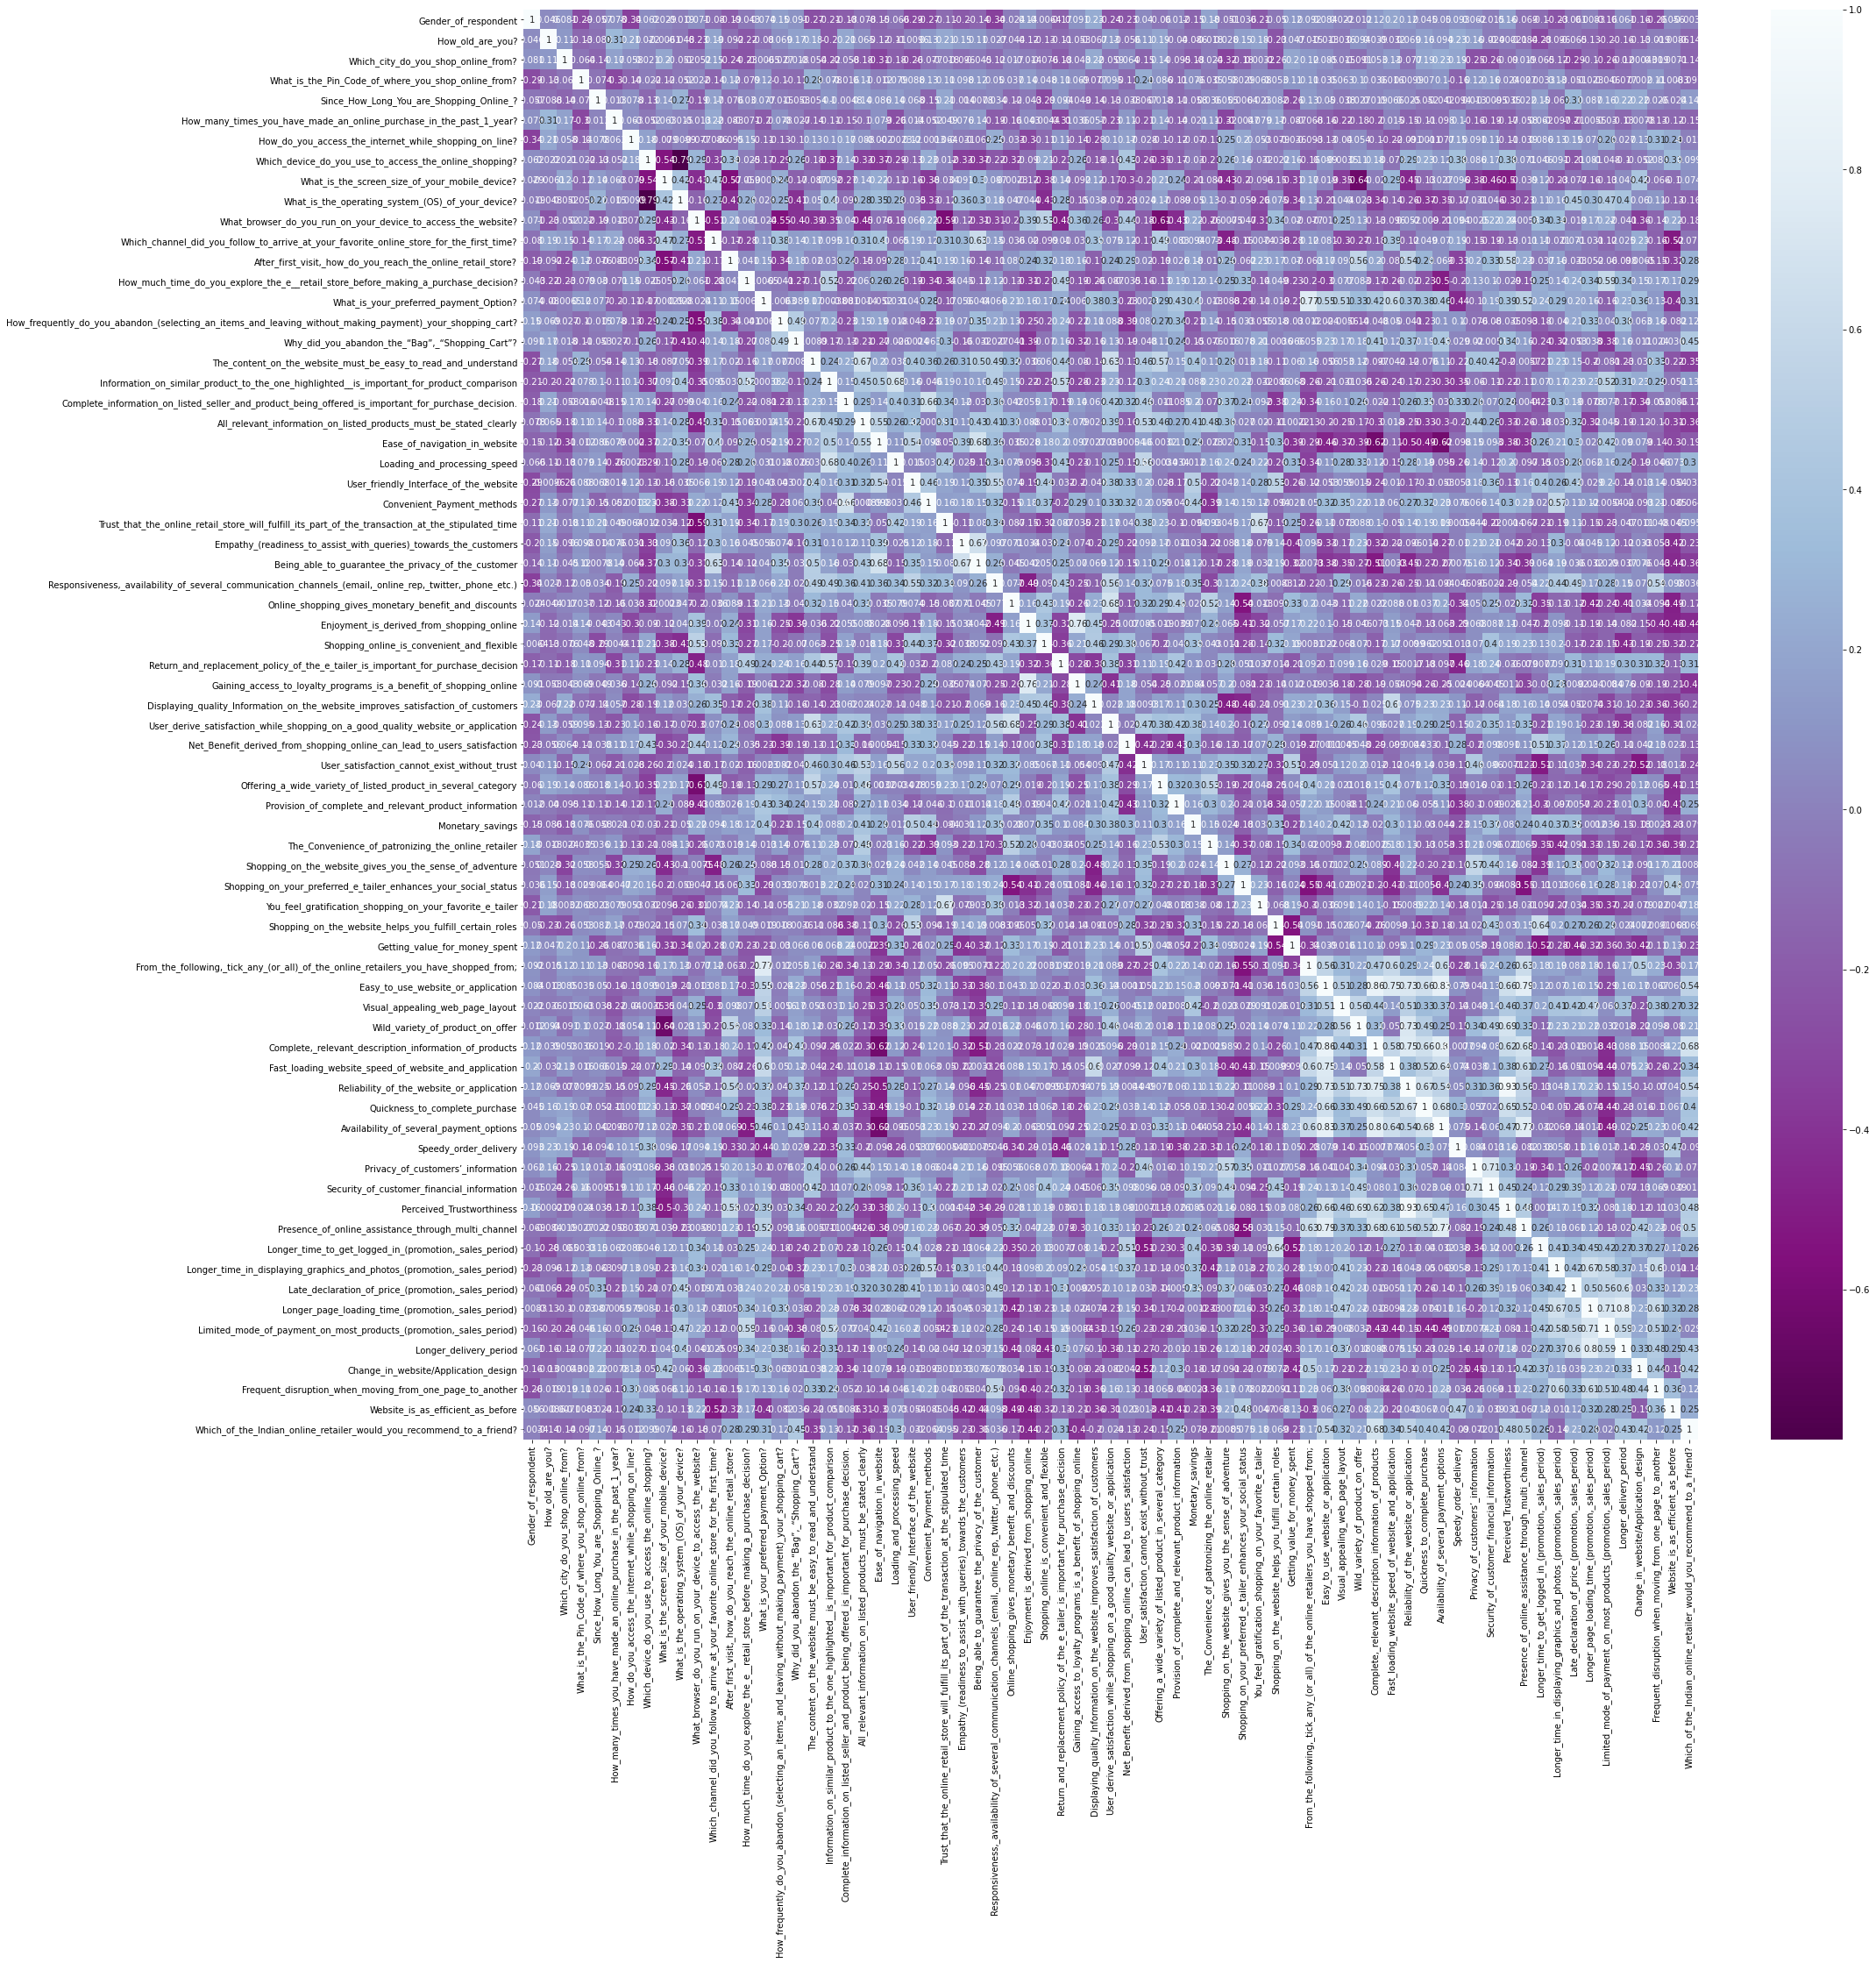

In [72]:
# Let's Visualize the correlation using heatmap.

plt.figure(figsize=(30,30))
sns.heatmap(df_cust.corr(), cmap= "BuPu_r", annot= True)